# Сборный проект 1

<b> Описание проекта </b>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

<b>Цель проекта</b>

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b> Задачи проекта</b>

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


<b>Данной проект разделим на несколько частей:</b>

<b> Изучение общей информации:</b>

 [ Изучение данных из-файла](#step_1)
 
 [ Вывод по данным](#step_2)
 
<b> Подготовка данных:</b>

 [Замена названия столбцов (приведение к нижнему регистру.](#step_3)
  
 [Заполнение пропусков в данных и предположительные причины их появления, а также приведение данных к нужным типам.](#step_4)
 
 [Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.](#step_5)
 
 [Проверка на дубликаты.](#step_6)
 
 <b> Исследовательский анализ данных</b>

 [Рассмотрим, сколько игр выпускалось в разные годы.](#step_7)
 
 [Рассмотрим, как менялись продажи по платформам.](#step_8)
  
 [Выбор платформ с наибольшими продажами по годам и распределение продаж игр на данных платформах по годам.](#step_9)
   
 [Определение жизненного цикла платформ.](#step_10)
 
 [Определение актуального переиода для дальнейшего исследования](#step_11)
 
 [Определение лидеров продаж в сегменте консолей](#step_12)
 
 [Ящик с усами по глобальным продажам игр в разбивке по платформам](#step_13)
 
 [Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.](#step_14)
 
 [Соотнесем выводы с продажами игр на других платформах.](#step_15)
 
 [Рассмотрим выделение игр по жанрам.](#step_16)
 
 <b> Составление портрета пользователя каждого региона</b>
 
 [Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5)](#step_17)
 
 [Самые популярные жанры (топ-5).](#step_18)
 
 [Влияние рейтинга ESRB на продажи в отдельном регионе.](#step_19)
 
  <b> Проверка гипотез</b>
 
 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#step_20)
 
 [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#step_21)
 
 [<b> Общий вывод </b>](#step_22)

<a id="step_1"></a>
# Изучение данных из файла

In [3]:
import pandas as pd # подгружаем библиотеку 'pandas'
import numpy as np # подгружаем библиотеку 'numpy'
import matplotlib.pyplot as plt # подключем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns # подключем библиотеку 'seaborn' для построения графиков
from scipy import stats as st # подключем фукцию stats из библиотеки 'scipy' для статистического анализа

# отключаем предупреждения об изменении отфильтрованных данных
pd.options.mode.chained_assignment = None
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel ('ERROR')

import warnings
warnings.filterwarnings("ignore")

In [4]:
try:
    df = pd.read_csv('/datasets/games.csv') # в 'df' читаем файл
except:
    df = pd.read_csv('games.csv') # в 'df' читаем файл

In [5]:
df.info() # смотрим общую информацию по всему датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id="step_2"></a>
<b>Вывод по данным</b>

•	Name — название игры - имеются пропуски данных

•	Platform — платформа

•	Year_of_Release — год выпуска - имеются пропуски данных

•	Genre — жанр игры - имеются пропуски данных

•	NA_sales — продажи в Северной Америке (миллионы проданных копий)

•	EU_sales — продажи в Европе (миллионы проданных копий)

•	JP_sales — продажи в Японии (миллионы проданных копий)

•	Other_sales — продажи в других странах (миллионы проданных копий)

•	Critic_Score — оценка критиков (максимум 100) - имеются пропуски данных

•	User_Score — оценка пользователей (максимум 10) - имеются пропуски данных, формат данных неоднородный

•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. - имеются пропуски данных

# Подготовка данных

В предобработке данных мы выполним:

1. Замены наименование столбцов (приведение к нижнему регистру)

2. Выясним причину пропусков в названиях игр, если необходимо - заполним.

3. Разберемся в причинах пропусков в столбце года выпуска игры, если необходимо - заполним.

4. Взглянем на пустые значения в столбце возрастного предпочтения, если необходимо - заполним.

5. Обработаем пустые значения в столбце оценки критиков, если необходимо заполним.
    
6. Обработаем пустые значения в столбце оценки пользователей, если необходимо - заполним.

7. Попытаемся разобраться с отсутствующими значениями в столбце рейтинга, если необходимо - заполним.

8. Создадим отдельный столбец с продажами по всем регионам, т.к. в дальнейшем он нам понадобится.

9. Проанализируем полученные результаты.

<a id="step_3"></a>
<b>Замена названия столбцов (приведение к нижнему регистру.</b>

In [6]:
df.columns = df.columns.str.lower() # приводим наименования столбцов к единому стилю (к нижнему оегистру)

<a id="step_4"></a>
<b>Заполнение пропусков в данных и предположительные причины их появления, а также приведение данных к нужным типам.</b>

In [7]:
df[df['name'].isna()] # посмотрим какие именно пустые значения в столюце 'name'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df[(df['platform'] == 'GEN') & (df['year_of_release'] == 1993)] # посмотрим что еще содержит таблица
                                                                # с такими условиями

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Не совсем понятно по каким принципам были допущены пропуски, т.к. ничего не указывает на системность.

In [9]:
df['name'] = df['name'].fillna('no_name') # заменяем пропущенные значения на 'no_name'

In [10]:
df[df['year_of_release'].isna()] # посмотрим какие именно пустые значения в столюце 'year_of_release'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Т.к. мы не знаем почему присутствуют пропуски в 'year_of_release', и их доля невелика, оставим так, как есть

In [11]:
df['genre'].unique() # посмотрим на уникальные значения 'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
# доля пустых значений в 'genre' невелика, поэтому заполним из значением 'no_genre'
df['genre'] = df['genre'].fillna('no_genre')

In [13]:
display(df['critic_score'].unique()) # посмотрим на уникальные значения 'critic_score'
display(df['user_score'].unique()) # посмотрим на уникальные значения 'user_score'
display(df['rating'].unique()) # посмотрим на уникальные значения 'rating'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пустаые значения в 'critic_score' по всей видимости образовались в результате отсутвтия оценки критиков, заполняем нулями.

In [14]:
df['critic_score'] = df['critic_score'].fillna(0) # заполняем нулями пустые значения 'critic_score'

Пустаые значения в 'user_score' по всей видимости образовались в результате отсутвтия оценки пользователей, но тут у нас еще присутствуют значения 'tbd'.

Из поиска Яндекса выяснил, что 'tbd' означает отсутствие оценок пользователей либо их незначительным количество.

В оценках пользователей присутствует оценка 0, а отрицательных оценок нет, мы не можем смешивать реальные оценки с вымышленными, но предполагаем, что оценка пользователей есть средняя.

Исходя из этого, заполняем пустые значения на -0.1, в дальнейшем, если оценка пользователей появиться, данные нивелируются.

Т.к. по информации, полученной ранее, данные имеют вид 'object', приведем их к виду float

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) # заменяем 'tbd' на пустые значения
df['user_score'] = df['user_score'].fillna(-0.1) # заменяем пустые значения на -0.1
df['user_score'] = df['user_score'].astype('float') # приводим к единому формату 'user_score'

Пустаые значения в 'rating' по всей видимости образовались в результате отсутвтия рейтинга, заполняем значением 'no_rating'.

In [16]:
df['rating'] = df['rating'].fillna('no_rating') # заменяем пустые значения 'rating' на 'no_rating'

<a id="step_5"></a>
<b>Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.</b>

Создадим отдельный столбец с суммарными продажами по всем регионам

In [17]:
# создаем столбец с общимми продажами
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<a id="step_6"></a>
<b>Проверка на дубликаты.</b>

In [18]:
# проверим на дубликаты
display(df.duplicated().sum())

df.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sales_total      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Результат предобработки:

1. Замены наименование столбцов (приведение к нижнему регистру)

2. Попытались выяснить причину пропусков в названиях игр, но не нашли системность в них, поэтому заменили на 'no_name'

3. Попытались разобраться в причинах пропусков в столбце года выпуска игры, но нечего нам не подсказало что это именно и с чем это едят, поэтому оставили пропуски так, как есть.

4. Взглянули на пустые значения в столбце возрастного предпочтения и решили заменить пропуски на значения 'no_genre', т.к. их доля невелика.

5. Обработали пустые значения в столбце оценки критиков и заменили их нулями.
    
6. Обработали пустые значения в столбце оценки пользователей и приняли решение заменить их на значение '-1' и привести к типу 'float'

7. Попытались разобраться с отсутствующими значениями в столбце рейтинга и заменили их на значение 'no_rating'

8. Создали отдельный столбец с продажами по всем регионам, т.к. в дальнейшем он нам понадобится.

9. В результате у нас получилось, что отсутствующие значения имееются только в столбце года релиза.

# Исследовательский анализ данных

<a id="step_7"></a>
<b>Рассмотрим, сколько игр выпускалось в разные годы.</b>

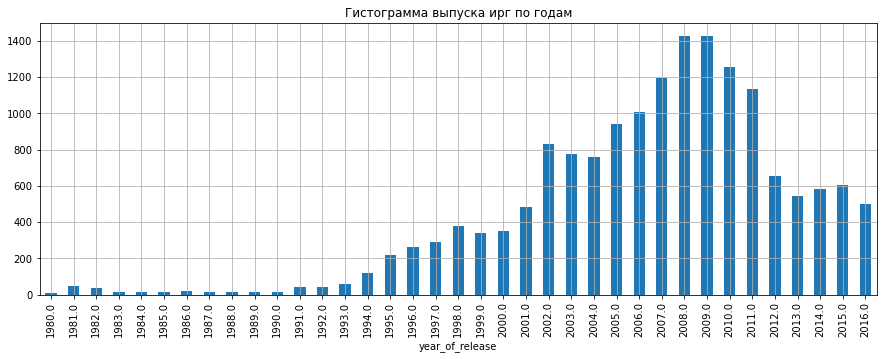

In [19]:
# сгруппируем таблицу по 'year_of_release' со значениями количеств игр
year_of_release_grouped = df.groupby('year_of_release')['name'].count()

# построим график
year_of_release_grouped.plot(kind='bar', y='name', style='o-', xlim=(0, 38), grid=True, figsize=(15, 5))

# подписи к графику
plt.title('Гистограмма выпуска ирг по годам')
plt.show()

Из построенного графика видим, что начиная с 2001 года выпуск игр резко пошел вверх вплоть до 2009 года с пиком выпуска игр в 2008-2009 гг. С 2009 года выпуск игр идет на спад вплоть до 2013 года. С 2013 года по 2015 год небольшой подъем и опять спад.

<a id="step_8"></a>
<b>Рассмотрим, как менялись продажи по платформам</b>

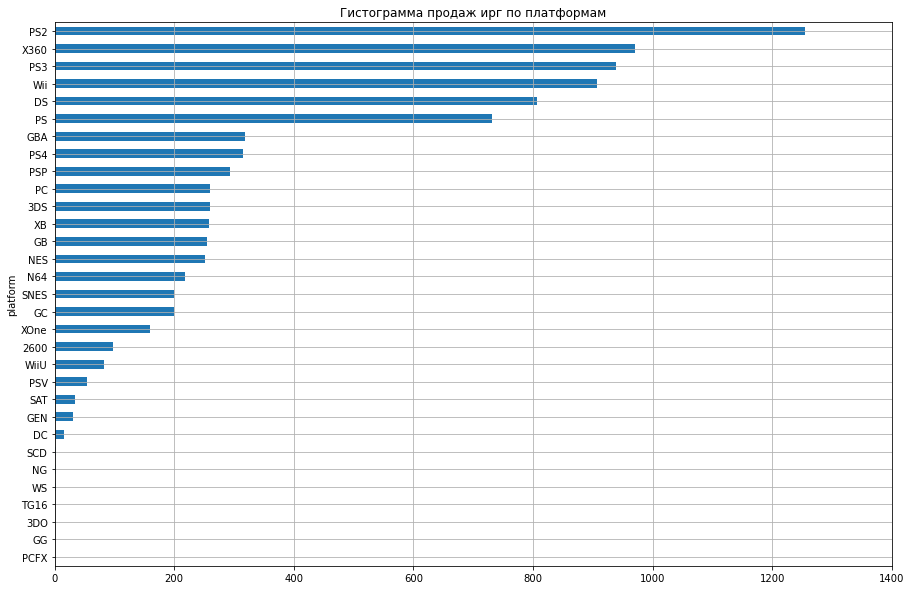

In [20]:
# сгруппируем и отсортируем нашу таблицу по 'platform' с суммами значений 'sales_total'
platform_grouped = df.groupby('platform')['sales_total'].sum().sort_values()

# построим график
platform_grouped.plot(kind='barh', y='name', style='o-', xlim=(0, 1400), grid=True, figsize=(15, 10))

# подписи к графику
plt.title('Гистограмма продаж ирг по платформам')
plt.show()

<a id="step_9"></a>
<b>Выбор платформ с наибольшими продажами по годам и распределение продаж игр на данных платформах по годам.</b>

На графике четко видны лидеры по продажам игр, а именно такие платформы, как:

PS2, X360, PS3, Wii, DS, PS

Рассмотрим распределение продаж игр на данных платформах по годам

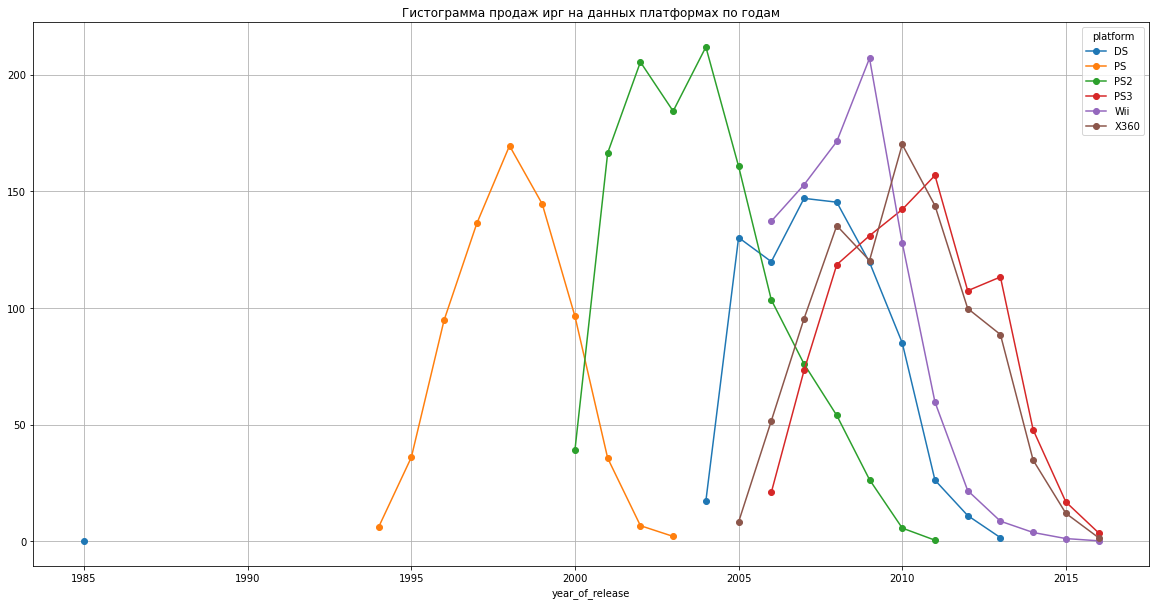

In [21]:
# создадим список с лидерами продаж
platform_grouped_lead = platform_grouped.index[len (platform_grouped)-6:len(platform_grouped)]

# сделаем сводную таблицу по лидерам продаж относительно сумм продаж и годов выпуска
platform_lead = (df
     .query('platform in @platform_grouped_lead')
     .pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
)

# построим график
platform_lead.plot(style='o-', grid=True, figsize=(20, 10)) 

# подписи к графику
plt.title('Гистограмма продаж ирг на данных платформах по годам')
plt.show()

<a id="step_10"></a>
<b>Определение жизненного цикла платформ.</b>

Из построенной гистограммы видим жизненный цикл платформ:

 - PS - появилась в 1994 году и ушла в 2003 году, жизненный цикл - 9 лет;
 
 - PS2 - с 2000 по 2011 - 11 лет;
 
 - DS - с 2004 по 2013 - 9 лет;
 
 - X360 - с 2005 по 2016 - 11 лет;
 
 - PS3 - с 2006 по 2016 - 10 лет;
 
- -Wii - с 2006 по 2016 - 10 лет.

Таким образом, в среднем жизненный цикл платформ составляет около 10 лет.

<a id="step_11"></a>
<b>Определение актуального переиода для дальнейшего исследования</b>

Для дальнейшего анализа примем актуальным периодом период с 2014 по 2016 год.
Хотя в период с 2006 по 2016 вышли новые консоли, жизненный цикл которых как-раз совпадает с окончанием актуального периода.

<a id="step_12"></a>
<b>Определение лидеров продаж в сегменте консолей</b>

Построим график продаж по годам за соответствующий актуальный период и посмотрим на лидиров продаж в сегменте консолей

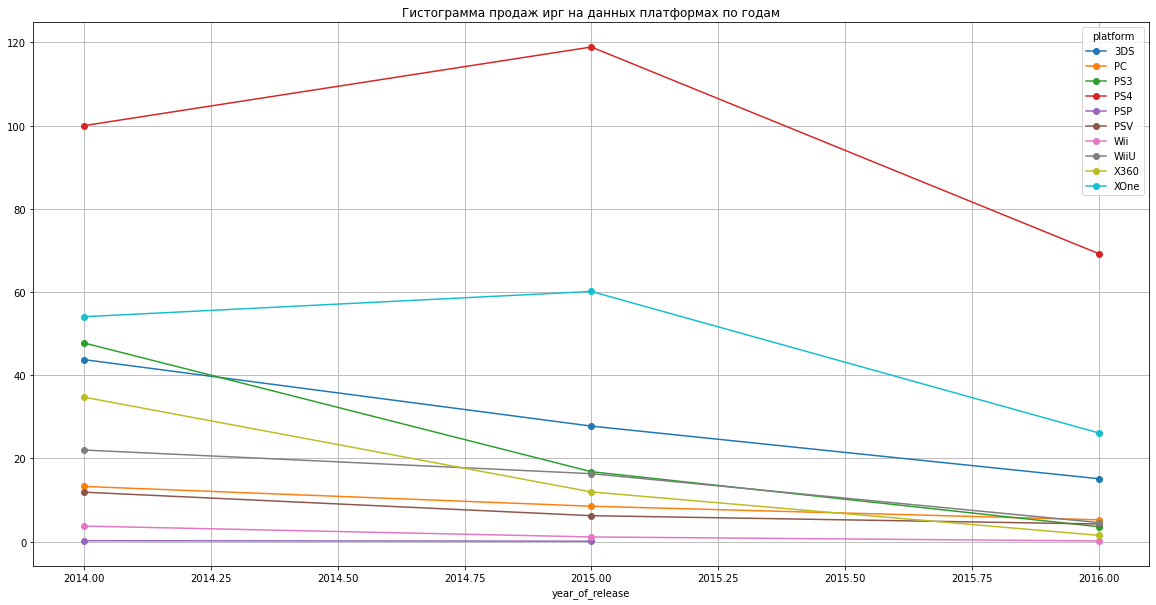

In [22]:
# сделаем сводную таблицу по актуальному периоду относительно суммам продаж и годов выпуска
platform_lead_actual = (df
     .query('year_of_release > = 2014')
     .pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
)

# построим график
platform_lead_actual.plot(style='o-', grid=True, figsize=(20, 10)) 

#подписи к графику
plt.title('Гистограмма продаж ирг на данных платформах по годам')
plt.show()

Из построенного графика видим, что на конец 2016 года лидерами продаж у нас выступают:

 - PS4
 
 - XOne
 
 - 3DS

Если PS4 и XOne начали свой жизненный цикл в 2013 году, то 3DS в 2011.

Ранее мы вывели средний цикл жизни консолей и можем предположить, что жизненный цикл вышеуказанных консолей окончится в период с 2021 по 2023 год, т.е. данные косоли еще не изжили себя.

<a id="step_13"></a>
<b>Ящик с усами по глобальным продажам игр в разбивке по платформам</b>

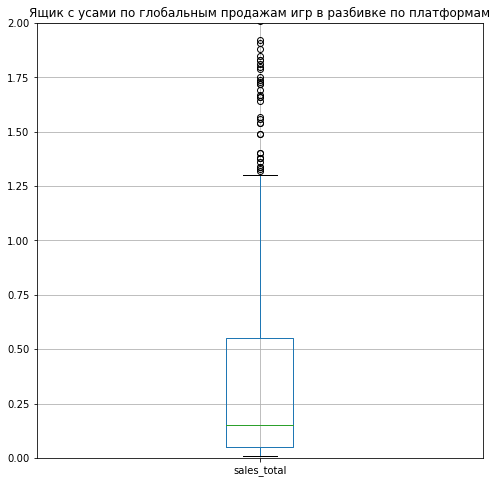

In [23]:
# датасет по актуальному периоду
lead_actual = df[df['year_of_release'] >= 2014]

platform_lead_actual_new = ['PS4', 'XOne', '3DS']

platform_lead_new = (lead_actual
     .query('platform in @platform_lead_actual_new'))

# построим график
platform_lead_new.boxplot('sales_total', figsize=(8, 8)).set_ylim(0, 2)

# подписи к графику
plt.title('Ящик с усами по глобальным продажам игр в разбивке по платформам')
plt.show()

(0.0, 2.0)

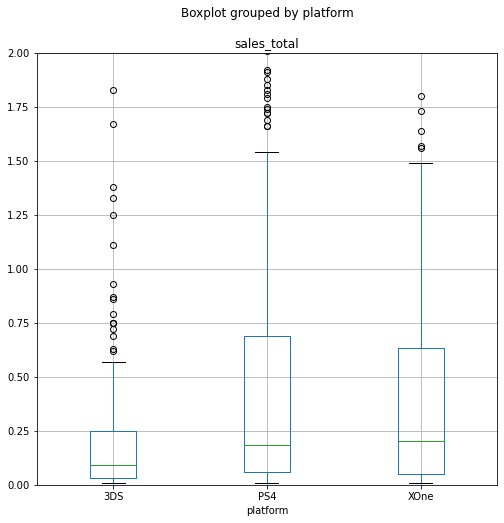

In [24]:
platform_lead_new.boxplot('sales_total', by='platform', figsize=(8, 8)).set_ylim(0, 2)

Из представленных данных видно, что общие продажи за указанный период по выбранным платформам находятся в промежутке от 50 тыс. до 550 тыс. Медианное значение в районе 150 тыс. Все, что больше 1 260 тыс. - выбросы.

<a id="step_14"></a>
<b>Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.</b>

<b>От отзывов критиков</b>

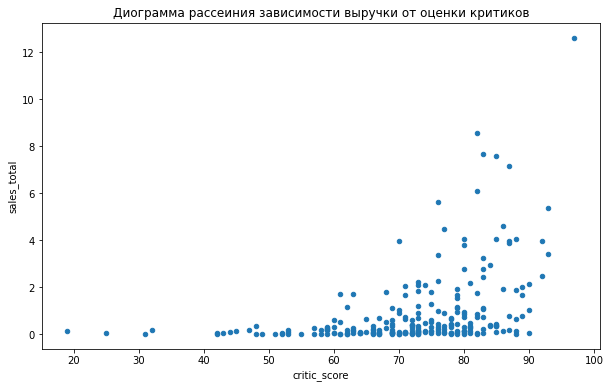

In [25]:
# собираем данные по PS4
df_ps4 = lead_actual[(lead_actual['platform'] == 'PS4') & (lead_actual['critic_score'] > 0)]

# рисуем диограмму рассеяния
df_ps4.plot(kind='scatter', x='critic_score', y='sales_total', figsize=(10,6))

# подписи к графику
plt.title('Диограмма рассеиния зависимости выручки от оценки критиков')
plt.show()

Чем выше оценка критиков, тем выше выручка

<b>От отзыва пользователей</b>

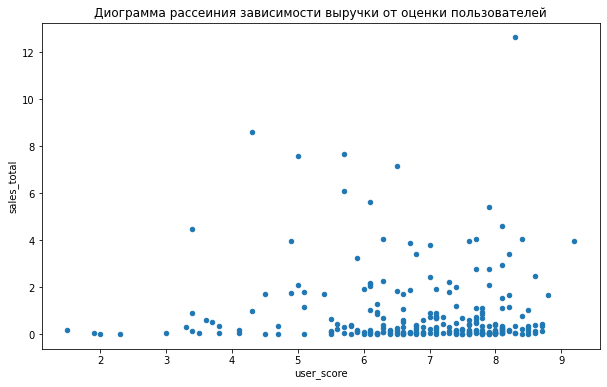

In [26]:
# собираем данные по PS4
df_ps4 = lead_actual[(lead_actual['platform'] == 'PS4') & (lead_actual['user_score'] > 0)]

# рисуем диаграмму рассеивания
df_ps4.plot(kind='scatter', x='user_score', y='sales_total', figsize=(10,6))

# подписи к графику
plt.title('Диограмма рассеиния зависимости выручки от оценки пользователей')
plt.show()

Чем выше оценка критиков, тем выше выручка, но наблюдаем также много вбросов

<b>Корреляция между отзывами и продажами</b>

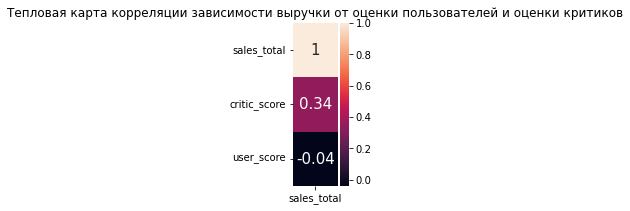

In [28]:
# собираем данные
df_ps4_corr = df_ps4[['sales_total' ,'critic_score', 'user_score']]

# строим график корреляции
plt.figure(figsize=(1,3))
sns.heatmap(
    df_ps4_corr.corr()[['sales_total']].sort_values(
        by='sales_total', ascending=False
    ), annot=True, annot_kws={'size':15}
)
# подписи к графику
plt.title('Тепловая карта корреляции зависимости выручки от оценки пользователей и оценки критиков')
plt.show ()

Из тепловой карты корреляции видим, что выручка больше зависит от оценки критиков, чем от оценки пользователей

<a id="step_15"></a>
<b>Соотнесем выводы с продажами игр на других платформах.</b>

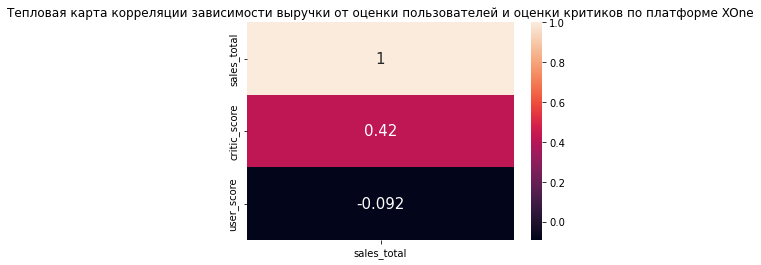

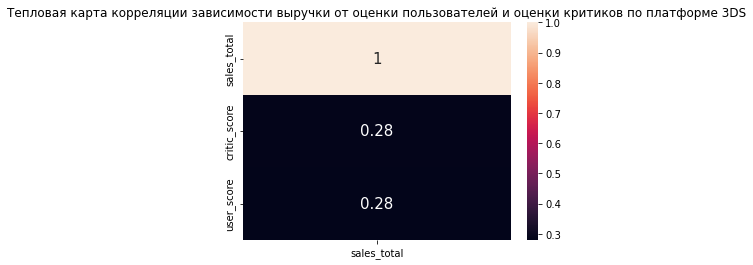

In [29]:
# собираем данные
df_XOne = lead_actual[(lead_actual['platform'] == 'XOne') \
                      & (lead_actual['critic_score'] > 0) \
                      & (lead_actual['user_score'] > 0)]

# собираем данные
df_3DS = lead_actual[(lead_actual['platform'] == '3DS') \
                     & (lead_actual['critic_score'] > 0) \
                     & (lead_actual['user_score'] > 0)]

# собираем данные
df_XOne_corr = df_XOne[['sales_total' ,'critic_score', 'user_score']]

# собираем данные
df_3DS_corr = df_3DS[['sales_total' ,'critic_score', 'user_score']]

# строим график корреляции
sns.heatmap(df_XOne_corr.corr()[['sales_total']].sort_values(by='sales_total',
                                                             ascending=False), 
            annot=True, annot_kws={'size':15})

# подписи к графику
plt.title('Тепловая карта корреляции зависимости выручки от оценки пользователей и оценки критиков по платформе XOne')
plt.show()

# строим график корреляции
sns.heatmap(df_3DS_corr.corr()[['sales_total']].sort_values(by='sales_total',ascending=False), 
            annot=True, annot_kws={'size':15})

# подписи к графику
plt.title('Тепловая карта корреляции зависимости выручки от оценки пользователей и оценки критиков по платформе 3DS')
plt.show()

Из тепловой карты корреляции видим, что тут уже не так все однозначно...

<a id="step_16"></a>
<b>Рассмотрим выделение игр по жанрам.</b>

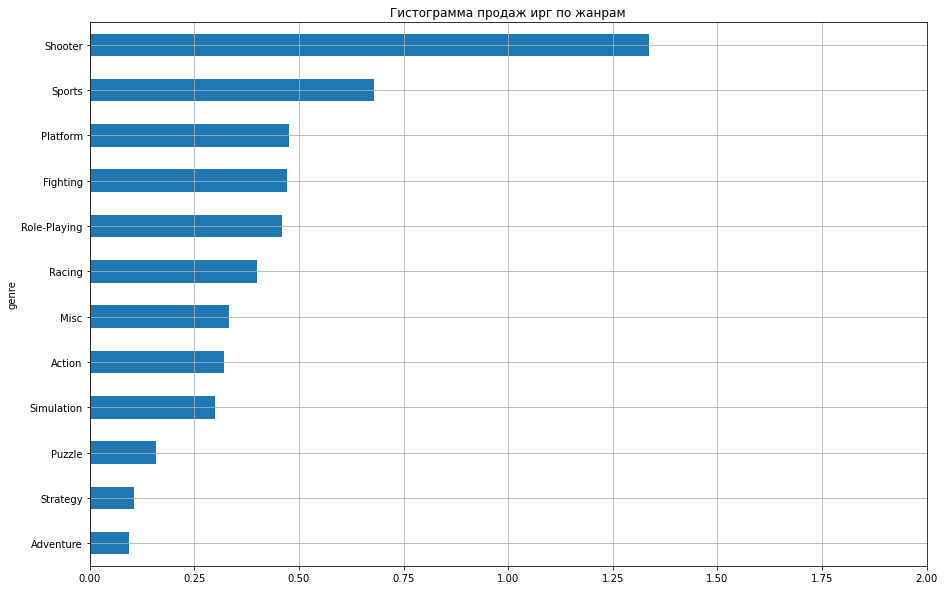

In [30]:
# сгруппируем и отсортируем нашу таблицу по 'platform' с медианными значениями 'sales_total'
genre_grouped = lead_actual.groupby('genre')['sales_total'].mean().sort_values()


# построим график
genre_grouped.plot(kind='barh', y='genre', style='o-', xlim=(0, 2), grid=True, figsize=(15, 10))

# подписи к графику
plt.title('Гистограмма продаж ирг по жанрам')
plt.show()

Из гистограммы видим, что самым прибыльным жанром в играх является Shooter

Чем выше оценка критиков и пользователей, тем выше выручка по исследованиям ТОП платформ. Лидерами по прибыльности выступают игры в жанре Shooter.

# Составление портрета пользователя каждого региона

<a id="step_17"></a>
<b>Определим для пользователя каждого региона (NA, EU, JP):</b>
<b>Самые популярные платформы (топ-5)</b>

In [31]:
def platform_region(region: str)-> str:
    '''
    Функция отпределения топовых платформ в регионе
    '''
    # сгруппируем и отсортируем нашу таблицу по 'platform' с суммами значений 'sales'
    region_grouped = lead_actual.groupby('platform')[region].sum().sort_values(ascending=False)
    display(region_grouped.head())

В Северной Америке ТОП-5 популярных платформ:

In [32]:
platform_region('na_sales')

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

В Европе ТОП-5 популярных платформ:

In [33]:
platform_region('eu_sales')

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

В Японии ТОП-5 популярных платформ:

In [34]:
platform_region('jp_sales')

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

В Северной Америке предпочитают приставки PS4, в Европе - PS4, а в Японии - 3DS

<a id="step_18"></a>
<b>Самые популярные жанры (топ-5)</b>

In [35]:
def platform_region(region: str)-> str:
    '''
    Функция отпределения топовых игровых жанров в регионе
    '''
    # сгруппируем и отсортируем нашу таблицу по 'platform' с суммами значений 'sales'
    region_grouped = lead_actual.groupby('genre')[region].sum().sort_values(ascending=False)
    display(region_grouped.head())

Самые популярные жанры (топ-5) в Северной Америке

In [36]:
platform_region('na_sales')

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Самые популярные жанры (топ-5) в Европе

In [37]:
platform_region('eu_sales')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Самые популярные жанры (топ-5) в Японии

In [38]:
platform_region('jp_sales')

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

В Северной Америке предпочитают игры жанра Shooter, в Европе - Action, а в Японии - Role-Playing

<a id="step_19"></a>
<b>Влияние рейтинга ESRB на продажи в отдельном регионе</b>

In [39]:
def platform_region(region: str)-> str:
    '''
    Функция подсчета рейтинга ESRB в регионе
    '''
    # сгруппируем и отсортируем нашу таблицу по 'platform' с суммами значений 'sales'
    region_grouped = lead_actual.groupby('rating')[region].sum().sort_values(ascending=False)
    display(region_grouped.head ())

Сравним продажи игр в отдельном регионе по рейтингу

In [40]:
platform_region('na_sales')
platform_region('eu_sales')
platform_region('jp_sales')

rating
M            96.42
no_rating    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

rating
M            93.44
no_rating    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

rating
no_rating    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64

Можно сделать вывод о том, что рейтинг ESRB не влияет на продажи в отдельных регионах. Хотя в Японии он отличается от Северной Америки и Европы.

В Северной Америке предпочитают приставки PS4, в Европе - PS4, а в Японии - 3DS

В Северной Америке предпочитают игры жанра Shooter, в Европе - Action, а в Японии - Role-Playing.

Можно сделать вывод о том, что рейтинг ESRB не влияет на продажи в отдельных регионах. Хотя в Японии он отличается от Северной Америки и Европы.

# Проверка гипотез

<a id="step_20"></a>
<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>

Примем за:
Н0 (нулевую гипотезу) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативную гипотезу) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [41]:
# сделаем таблицу с интересующими нас значениями для пользователей платформ PC
df_PC = lead_actual[(lead_actual['platform'] == 'PC') \
                    & (lead_actual['critic_score'] > 0) \
                    & (lead_actual['user_score'] > 0)]

# считаем дисперсию по оценке пользователей пользователей платформ XOne
print('Дисперсия по оценке пользователей пользователей платформ XOne', np.var(df_XOne['user_score']))

# считаем дисперсию по оценке пользователей пользователей платформ PC
print('Дисперсия по оценке пользователей пользователей платформ PC:', np.var(df_PC['user_score']))

# принимаем критический уровень статистической значимости в 5%
alpha=0.05

# проверим, равны ли средние двух генеральных совокупностей
results = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'], equal_var=True) 

print('p-значение: ', results.pvalue)
      
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия по оценке пользователей пользователей платформ XOne 1.727856672952941
Дисперсия по оценке пользователей пользователей платформ PC: 2.732518714555766
p-значение:  0.12817793652639856
Не получилось отвергнуть нулевую гипотезу


Т.к. при проверке нулевой гипотезы (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) мы ее не отвергли, то это верно.

<a id="step_21"></a>
<b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные</b>

Примем за:

Н0 (нулевую гипотезу) - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Н1 (альтернативную гипотезу) - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются между собой.

In [42]:
# сделаем таблицу с интересующими нас значениями для пользователей жанра Action
df_Action = lead_actual[(lead_actual['genre'] == 'Action') \
                        & (lead_actual['critic_score'] > 0) \
                        & (lead_actual['user_score'] > 0)]

# сделаем таблицу с интересующими нас значениями для пользователей жанра Sports
df_Sports = lead_actual[(lead_actual['genre'] == 'Sports') \
                        & (lead_actual['critic_score'] > 0) \
                        & (lead_actual['user_score'] > 0)]

# считаем дисперсию по оценке пользователей пользователей жанра Action
print('Дисперсия по оценке пользователей пользователей жанра Action', np.var(df_Action['user_score']))

# считаем дисперсию по оценке пользователей пользователей жанра Sports
print('Дисперсия по оценке пользователей пользователей жанра Sports:', np.var(df_Sports['user_score']))

# принимаем критический уровень статистической значимости в 5%
alpha=0.05

# проверим, равны ли средние двух генеральных совокупностей
results = st.ttest_ind(df_Action['user_score'], df_Sports['user_score'], equal_var=True) 

print('p-значение: ', results.pvalue)
      
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия по оценке пользователей пользователей жанра Action 1.7985848745366686
Дисперсия по оценке пользователей пользователей жанра Sports: 2.2042125127014076
p-значение:  4.0540895999943536e-10
Отвергаем нулевую гипотезу


Т.к. при проверке нулевой гипотезы (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые) мы ее отвергли, то правильно будет принять альтернативную гипотезу, а именно: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются между собой.

<a id="step_22"></a>
<b>Общий вывод</b>

В целом рынок игровых консолей в последние 10 лет падает.

Средний жизненный цикл игровых консолей - 10 лет.

Выручка при продаже игр больше зависит от оценки критиков, чем от оценки пользователей.

В Северной Америке предпочитают приставки X360, в Европе - PS3, а в Японии - DS.

В Северной Америке предпочитают игры жанра Action, в Европе тоже Action, а в Японии - Role-Playing.

Рейтинг ESRB не влияет на продажи в отдельных регионах

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются между собой.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются между собой.